# Solving a differential equation with SageMath

In [1]:
%display latex

## Exact solutions: `desolve`

In [2]:
x = var('x')
y = function('y')(x)
y

y(x)

In [3]:
eq = diff(y, x) - y == x*y^4
eq

-y(x) + diff(y(x), x) == x*y(x)^4

In [4]:
print(eq)

-y(x) + diff(y(x), x) == x*y(x)^4


In [5]:
desolve(eq, y)

e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3)

In [6]:
print(desolve(eq, y))

e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3)


In [7]:
desolve(eq, y, show_method='True')

[e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3), 'bernoulli']

In [8]:
desolve(eq, y, ics=[0, 2])

e^x/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(1/3)

In [9]:
f(x) = desolve(eq, y, ics=[0, 2])
diff(f(x), x) - f(x) - x*f(x)^4

-x*e^(4*x)/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(4/3) + 1/3*((3*x - 1)*e^(3*x) + e^(3*x))*e^x/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(4/3)

In [10]:
z = diff(f(x), x) - f(x) - x*f(x)^4
z

-x*e^(4*x)/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(4/3) + 1/3*((3*x - 1)*e^(3*x) + e^(3*x))*e^x/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(4/3)

In [11]:
z = diff(f(x), x) - f(x) - x*f(x)^4

In [12]:
z.simplify_full()

0

In [13]:
f(0)

2

## System of differential equations: `desolve_system`

In [14]:
y1 = function('y_1')(x)
y2 = function('y_2')(x)
y3 = function('y_3')(x)
y = vector([y1, y2, y3])
y

(y_1(x), y_2(x), y_3(x))

In [15]:
A = matrix([[2,-2,0], [-2,0,2], [0,2,2]])
A

[ 2 -2  0]
[-2  0  2]
[ 0  2  2]

In [16]:
eqs = [diff(y[i],x) == (A*y)[i] for i in range(3)]
eqs

[diff(y_1(x), x) == 2*y_1(x) - 2*y_2(x),
 diff(y_2(x), x) == -2*y_1(x) + 2*y_3(x),
 diff(y_3(x), x) == 2*y_2(x) + 2*y_3(x)]

In [17]:
for eq in eqs:
    show(eq)

diff(y_1(x), x) == 2*y_1(x) - 2*y_2(x)

diff(y_2(x), x) == -2*y_1(x) + 2*y_3(x)

diff(y_3(x), x) == 2*y_2(x) + 2*y_3(x)

In [18]:
sol = desolve_system(eqs, [y1,y2,y3], ics=[0, 2, 1, -2])
sol

[y_1(x) == e^(4*x) + e^(-2*x),
 y_2(x) == -e^(4*x) + 2*e^(-2*x),
 y_3(x) == -e^(4*x) - e^(-2*x)]

## Numerical solutions

In [19]:
rho = function('rho', latex_name=r'\rho')
p = function('p')
m = function('m')
Phi = function('Phi', latex_name=r'\Phi')
r = var('r')
G = var('G')

In [20]:
eq1 = diff(m(r), r) == 4*pi*r^2*rho(r)
eq2 = diff(Phi(r), r) == G*m(r)/r^2
eq3 = diff(p(r), r) == -rho(r)*G*m(r)/r^2
for eq in [eq1, eq2, eq3]:
    show(eq)

diff(m(r), r) == 4*pi*r^2*rho(r)

diff(Phi(r), r) == G*m(r)/r^2

diff(p(r), r) == -G*m(r)*rho(r)/r^2

In [21]:
k = var('k')
gam = var('gam', latex_name=r'\gamma')
p_eos(r) = k*rho(r)^gam
p_eos(r)

k*rho(r)^gam

In [22]:
eq3_rho = eq3.substitute_function(p, p_eos)
eq3_rho

gam*k*rho(r)^(gam - 1)*diff(rho(r), r) == -G*m(r)*rho(r)/r^2

In [23]:
eq3_rho = (eq3_rho / (gam*k*rho(r)^(gam-1))).simplify_full()
eq3_rho

diff(rho(r), r) == -G*rho(r)^(-gam + 2)*m(r)/(gam*k*r^2)

In [24]:
eqs = [eq1, eq2, eq3_rho]
for eq in eqs:
    show(eq)

diff(m(r), r) == 4*pi*r^2*rho(r)

diff(Phi(r), r) == G*m(r)/r^2

diff(rho(r), r) == -G*rho(r)^(-gam + 2)*m(r)/(gam*k*r^2)

In [25]:
k0 = 1/4
gam0 = 2
rhs = [eq.rhs().subs({k: k0, gam: gam0, G: 1}) for eq in eqs]
rhs

[4*pi*r^2*rho(r), m(r)/r^2, -2*m(r)/r^2]

In [26]:
rhs[0] = rhs[0] * unit_step(rho(r))
rhs[2] = rhs[2] * unit_step(rho(r))
rhs

[4*pi*r^2*rho(r)*unit_step(rho(r)), m(r)/r^2, -2*m(r)*unit_step(rho(r))/r^2]

In [27]:
rhs.append(1 * unit_step(rho(r)))
rhs

[4*pi*r^2*rho(r)*unit_step(rho(r)),
 m(r)/r^2,
 -2*m(r)*unit_step(rho(r))/r^2,
 unit_step(rho(r))]

In [28]:
var('m_1 Phi_1 rho_1 r_1')
rhs = [y.subs({m(r): m_1, Phi(r): Phi_1, rho(r): rho_1}) for y in rhs]
rhs

[4*pi*r^2*rho_1*unit_step(rho_1),
 m_1/r^2,
 -2*m_1*unit_step(rho_1)/r^2,
 unit_step(rho_1)]

In [29]:
rho_c = 1
r_min = 1e-8
r_max = 1
np = 200
delta_r = (r_max - r_min) / (np-1)

In [30]:
sol = desolve_system_rk4(rhs, vars=(m_1, Phi_1, rho_1, r_1), ivar=r, 
                         ics=[r_min, 0, 0, rho_c, r_min], 
                         end_points=r_max, step=delta_r)

In [31]:
sol[:10]

[[1.00000000000000e-8, 0, 0, 1, 1.00000000000000e-8],
 [0.00502513557788945,
  5.31450779388153e-07,
  6.61093383900868e-05,
  0.9998677813232199,
  0.005025135577889449],
 [0.0100502611557789,
  4.25098772067275e-06,
  0.000225597211871204,
  0.9995488055762576,
  0.0100502611557789],
 [0.01507538673366835,
  1.43426583858054e-05,
  0.0004901319257912,
  0.9990197361484175,
  0.01507538673366835],
 [0.0201005123115578,
  3.39824144477692e-05,
  0.000860123055770768,
  0.9982797538884585,
  0.0201005123115578],
 [0.02512563788944725,
  6.63340827691725e-05,
  0.001335517840616862,
  0.9973289643187663,
  0.02512563788944725],
 [0.0301507634673367,
  0.000114545342117682,
  0.001916160150486661,
  0.9961676796990266,
  0.0301507634673367],
 [0.03517588904522615,
  0.000181743715045901,
  0.002601838124772868,
  0.9947963237504542,
  0.03517588904522614],
 [0.0402010146231156,
  0.000271032578936277,
  0.003392294808802804,
  0.9932154103823944,
  0.04020101462311559],
 [0.04522614020100505,
  0.000385487200037859,
  0.004287231392838771,
  0.9914255372143225,
  0.04522614020100504]]

In [32]:
rho_sol = [(s[0], s[3]) for s in sol]
rho_sol[:10]

[(1.00000000000000e-8, 1),
 (0.00502513557788945, 0.9998677813232199),
 (0.0100502611557789, 0.9995488055762576),
 (0.01507538673366835, 0.9990197361484175),
 (0.0201005123115578, 0.9982797538884585),
 (0.02512563788944725, 0.9973289643187663),
 (0.0301507634673367, 0.9961676796990266),
 (0.03517588904522615, 0.9947963237504542),
 (0.0402010146231156, 0.9932154103823944),
 (0.04522614020100505, 0.9914255372143225)]

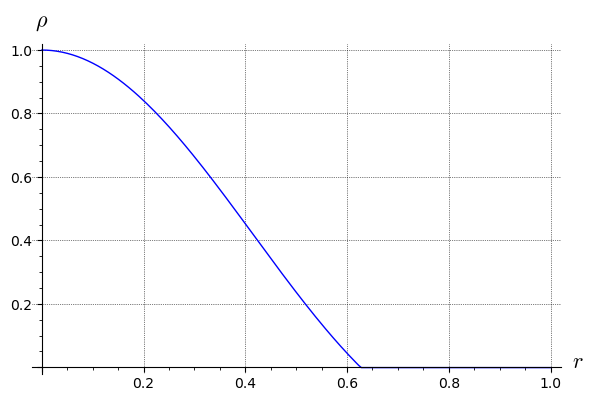

In [33]:
graph = line(rho_sol, axes_labels=[r'$r$', r'$\rho$'], gridlines=True)
graph

In [34]:
Phi_sol = [(s[0], s[2]) for s in sol]
Phi_sol[:10]

[(1.00000000000000e-8, 0),
 (0.00502513557788945, 6.61093383900868e-05),
 (0.0100502611557789, 0.000225597211871204),
 (0.01507538673366835, 0.0004901319257912),
 (0.0201005123115578, 0.000860123055770768),
 (0.02512563788944725, 0.001335517840616862),
 (0.0301507634673367, 0.001916160150486661),
 (0.03517588904522615, 0.002601838124772868),
 (0.0402010146231156, 0.003392294808802804),
 (0.04522614020100505, 0.004287231392838771)]

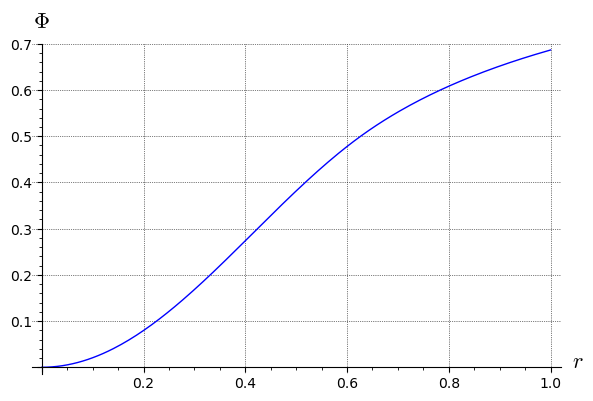

In [35]:
graph = line(Phi_sol, axes_labels=[r'$r$', r'$\Phi$'], gridlines=True)
graph